In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
population_df = pd.read_csv("Data_MF/Population.csv")
car_df = pd.read_csv("Data_MF/Car ownership per city.csv")
cycle_paths_df = pd.read_csv("Data_MF/Cycle paths.csv")
commute_times_df = pd.read_csv("Data_MF/Commute times.csv")
income_df = pd.read_csv("Data_MF/avghouseholdincome.csv", header = 1)
city_df = pd.read_csv("Data_MF/rain and rental per city.csv")

In [3]:
city_region_map = {
    "London": "London",
    "Brighton": "South East",
    "Norwich": "East of England",
    "Manchester": "Greater Manchester",
    "Birmingham": "West Midlands (metropolitan county)",
    "Cardiff": "Wales",
    "Edinburgh": "Scotland",
    "Glasgow": "Scotland",
    "Newcastle": "Tyne and Wear",
    "Sheffield": "South Yorkshire",
    "Bristol": "South West",
    "Leeds": "West Yorkshire",
    "Oxford": "South East",
    "Cambridge": "East of England",
    "Nottingham": "East Midlands",
    "Liverpool": "Merseyside"
}

city_df["Region"] = city_df["City"].map(city_region_map)
city_df.head()


,City,Competitors,Average Annual Rainfall (mm),Region
0,London,2,602,London
1,Brighton,1,801,South East
2,Norwich,1,514,East of England
3,Manchester,2,807,Greater Manchester
4,Birmingham,1,660,West Midlands (metropolitan county)


In [4]:
region_ratio_df = commute_times_df[["Region", "bike to all ratio"]]
region_ratio_df.head()

,Region,bike to all ratio
0,North East,0.782609
1,Tyne and Wear,0.629630
2,Rest of North East,0.950000
3,North West,0.840000
4,Greater Manchester,0.827586


In [5]:
merged_regiondf = city_df.merge(region_ratio_df, on="Region", how="left")
merged_regiondf.head()

,City,Competitors,Average Annual Rainfall (mm),Region,bike to all ratio
0,London,2,602,London,0.651163
1,Brighton,1,801,South East,0.653846
2,Norwich,1,514,East of England,0.666667
3,Manchester,2,807,Greater Manchester,0.827586
4,Birmingham,1,660,West Midlands (metropolitan county),0.586207


In [6]:
merged_popdf = merged_regiondf.merge(population_df, on="City", how="left")
merged_popdf.head()

,City,Competitors,Average Annual Rainfall (mm),Region,bike to all ratio,population
0,London,2,602,London,0.651163,7556900
1,Brighton,1,801,South East,0.653846,139001
2,Norwich,1,514,East of England,0.666667,213166
3,Manchester,2,807,Greater Manchester,0.827586,395515
4,Birmingham,1,660,West Midlands (metropolitan county),0.586207,984333


In [7]:
# Step 1: list all London boroughs
london_boroughs = [
    "Barking and Dagenham","Barnet","Bexley and Greenwich","Brent","Bromley","Camden and City of London","Croydon",
    "Ealing","Enfield","Hackney and Newham", "Haringey and Islington", "Harrow and Hillingdon", "Hounslow and Richmond upon Thames","Islington","Kensington & Chelsea and Hammersmith & Fulham",
    "Lambeth","Lewisham and Southwark","Merton, Kingston upon Thames and Sutton","Redbridge and Waltham Forest",
    "Richmond upon Thames", "Tower Hamlets","Wandsworth","Westminster"
]

# Step 2: replace borough names with "London"
cycle_paths_df['City'] = cycle_paths_df['City'].apply(
    lambda x: "London" if x in london_boroughs else x
)

# Step 3: aggregate and recompute ratio
cycle_paths_df_grouped = (
    cycle_paths_df
    .groupby("City", as_index=False)
    .agg({
        "overview-total-cycle-infrastructure": "sum",
        "overview-main-road-network": "sum"
    })
)

cycle_paths_df_grouped['ratio-cycle_infra-main_roads'] = (
    cycle_paths_df_grouped['overview-total-cycle-infrastructure'] / cycle_paths_df_grouped['overview-main-road-network']
)


In [8]:
merged_cyclewaydf = merged_popdf.merge(
    cycle_paths_df_grouped[['City', 'ratio-cycle_infra-main_roads']],  # only bring in this column
    on='City',
    how='left'
)

merged_cyclewaydf.head(15)


,City,Competitors,Average Annual Rainfall (mm),Region,bike to all ratio,population,ratio-cycle_infra-main_roads
0,London,2,602,London,0.651163,7556900,0.365185
1,Brighton,1,801,South East,0.653846,139001,0.375458
2,Norwich,1,514,East of England,0.666667,213166,0.234627
3,Manchester,2,807,Greater Manchester,0.827586,395515,0.391634
4,Birmingham,1,660,West Midlands (metropolitan county),0.586207,984333,0.304014
5,Cardiff,2,1152,Wales,0.863636,447287,0.307605
6,Edinburgh,1,700,Scotland,0.833333,464990,0.477065
7,Glasgow,1,1128,Scotland,0.833333,591620,0.247029
8,Newcastle,1,650,Tyne and Wear,0.629630,192382,0.398100
9,Sheffield,1,818,South Yorkshire,1.000000,685368,0.261662


In [9]:
city_region_map2 = {
    "London": "Greater London Authority",
    "Brighton": "Greater Brighton City Region",
    "Norwich": "Cambridgeshire and Peterborough Combined Authority",
    "Manchester": "Greater Manchester Combined Authority",
    "Birmingham": "West Midlands Combined Authority",
    "Cardiff": "Cardiff Capital Region",
    "Edinburgh": "Edinburgh and South East Scotland City Region",
    "Glasgow": "Glasgow City Region",
    "Newcastle": "North East Combined Authority",
    "Sheffield": "South Yorkshire Mayoral Combined Authority",
    "Bristol": "West of England Combined Authority",
    "Leeds": "West Yorkshire Combined Authority",
    "Oxford": "West of England Combined Authority",
    "Cambridge": "Cambridgeshire and Peterborough Combined Authority",
    "Nottingham": "East Midlands Combined Authority",
    "Liverpool": "Liverpool City Region Combined Authority"
}

merged_cyclewaydf["Area"] = city_df["City"].map(city_region_map2)
merged_cyclewaydf.head()
merged_cyclewaydf = merged_cyclewaydf.merge(
    income_df[['Area', '2022']],  # only bring in this column
    on='Area',
    how='left'
)

merged_cyclewaydf.head(15)

,City,Competitors,Average Annual Rainfall (mm),Region,bike to all ratio,population,ratio-cycle_infra-main_roads,Area,2022
0,London,2,602,London,0.651163,7556900,0.365185,Greater London Authority,"32,330"
1,Brighton,1,801,South East,0.653846,139001,0.375458,Greater Brighton City Region,"24,631"
2,Norwich,1,514,East of England,0.666667,213166,0.234627,Cambridgeshire and Peterborough Combined Autho...,"22,816"
3,Manchester,2,807,Greater Manchester,0.827586,395515,0.391634,Greater Manchester Combined Authority,"19,094"
4,Birmingham,1,660,West Midlands (metropolitan county),0.586207,984333,0.304014,West Midlands Combined Authority,"17,464"
5,Cardiff,2,1152,Wales,0.863636,447287,0.307605,Cardiff Capital Region,"18,672"
6,Edinburgh,1,700,Scotland,0.833333,464990,0.477065,Edinburgh and South East Scotland City Region,"22,779"
7,Glasgow,1,1128,Scotland,0.833333,591620,0.247029,Glasgow City Region,"19,552"
8,Newcastle,1,650,Tyne and Wear,0.629630,192382,0.398100,North East Combined Authority,"18,525"
9,Sheffield,1,818,South Yorkshire,1.000000,685368,0.261662,South Yorkshire Mayoral Combined Authority,"18,070"


In [10]:
# Filter out "Does not apply"
car_df = car_df[car_df["Car or van availability (5 categories) Code"] != -8]

# Create Has Car / No Car column
car_df["Has_Car"] = car_df["Car or van availability (5 categories) Code"].apply(lambda x: 0 if x == 0 else 1)

# Aggregate by local authority
car_summary = car_df.groupby("2023 Lower tier local authorities")["Observation"].agg([
    ("No_Car", lambda x: x[car_df.loc[x.index, "Has_Car"]==0].sum()),
    ("Has_Car", lambda x: x[car_df.loc[x.index, "Has_Car"]==1].sum())
]).reset_index()

# Calculate percentage of households with NO car
car_summary["No_Car_Percent"] = car_summary["No_Car"] / (car_summary["Has_Car"] + car_summary["No_Car"]) * 100

car_summary.head(50)

,2023 Lower tier local authorities,No_Car,Has_Car,No_Car_Percent
0,Adur,5111,22568,18.465262
1,Amber Valley,9450,46826,16.792238
2,Arun,12254,60407,16.864618
3,Ashfield,11228,43282,20.598055
4,Ashford,7706,45877,14.381427
5,Babergh,4683,35517,11.649254
6,Barking and Dagenham,25682,48220,34.751428
7,Barnet,44580,104337,29.936139
8,Barnsley,24580,83474,22.747885
9,Basildon,14300,62062,18.726592


In [11]:
# Step 1: list of all London boroughs + City of London
london_boroughs1 = [
    "City of London", "Barking and Dagenham", "Barnet", "Bexley", "Brent",
    "Bromley", "Camden", "Croydon", "Ealing", "Enfield", "Greenwich",
    "Hackney", "Hammersmith and Fulham", "Haringey", "Harrow", "Havering",
    "Hillingdon", "Hounslow", "Islington", "Kensington and Chelsea",
    "Kingston upon Thames", "Lambeth", "Lewisham", "Merton", "Newham",
    "Redbridge", "Richmond upon Thames", "Southwark", "Sutton", "Tower Hamlets",
    "Waltham Forest", "Wandsworth", "Westminster"
]

# Replace borough names with "London"
car_summary["Authority"] = car_summary["2023 Lower tier local authorities"].apply(
    lambda x: "London" if x in london_boroughs1 else x
)

# Aggregate into one row per authority
car_summary_grouped = car_summary.groupby("Authority", as_index=False).agg({
    "No_Car": "sum",
    "Has_Car": "sum"
})

# Compute percentage
car_summary_grouped["No_Car_Percent"] = car_summary_grouped["No_Car"] / (car_summary_grouped["Has_Car"] + car_summary_grouped["No_Car"]) * 100

car_summary_grouped.head()

,Authority,No_Car,Has_Car,No_Car_Percent
0,Adur,5111,22568,18.465262
1,Amber Valley,9450,46826,16.792238
2,Arun,12254,60407,16.864618
3,Ashfield,11228,43282,20.598055
4,Ashford,7706,45877,14.381427


In [12]:
master_df = merged_cyclewaydf.merge(
    car_summary_grouped[['Authority', 'No_Car_Percent']],
    left_on='City',   # column in merged_cyclewaydf
    right_on='Authority',  # column in car_summary_grouped
    how='left'
)

master_df.head(15)


,City,Competitors,Average Annual Rainfall (mm),Region,bike to all ratio,population,ratio-cycle_infra-main_roads,Area,2022,Authority,No_Car_Percent
0,London,2,602,London,0.651163,7556900,0.365185,Greater London Authority,"32,330",London,42.065429
1,Brighton,1,801,South East,0.653846,139001,0.375458,Greater Brighton City Region,"24,631",Brighton,37.445841
2,Norwich,1,514,East of England,0.666667,213166,0.234627,Cambridgeshire and Peterborough Combined Autho...,"22,816",Norwich,32.698304
3,Manchester,2,807,Greater Manchester,0.827586,395515,0.391634,Greater Manchester Combined Authority,"19,094",Manchester,39.011419
4,Birmingham,1,660,West Midlands (metropolitan county),0.586207,984333,0.304014,West Midlands Combined Authority,"17,464",Birmingham,31.673421
5,Cardiff,2,1152,Wales,0.863636,447287,0.307605,Cardiff Capital Region,"18,672",Cardiff,25.990783
6,Edinburgh,1,700,Scotland,0.833333,464990,0.477065,Edinburgh and South East Scotland City Region,"22,779",Edinburgh,37.697214
7,Glasgow,1,1128,Scotland,0.833333,591620,0.247029,Glasgow City Region,"19,552",Glasgow,43.685629
8,Newcastle,1,650,Tyne and Wear,0.629630,192382,0.398100,North East Combined Authority,"18,525",Newcastle,36.614683
9,Sheffield,1,818,South Yorkshire,1.000000,685368,0.261662,South Yorkshire Mayoral Combined Authority,"18,070",Sheffield,29.248976


In [13]:
#Cleaning up the output
cols_to_keep = ['City', 'Competitors', 'Average Annual Rainfall (mm)', 
                'bike to all ratio', 'population', 'ratio-cycle_infra-main_roads', 
                '2022', 'No_Car_Percent']

df_clean = master_df[cols_to_keep].copy()

df_clean['bike to all ratio'] = df_clean['bike to all ratio'].round(3)
df_clean['ratio-cycle_infra-main_roads'] = df_clean['ratio-cycle_infra-main_roads'].round(3)
df_clean['No_Car_Percent'] = df_clean['No_Car_Percent'].round(2)


df_clean.rename(columns={
    'bike to all ratio': 'Cycle Commute Ratio',
    'population': 'Population',
    'ratio-cycle_infra-main_roads': 'Cycle Infra to Main Roads',
    '2022': 'Avg GDHI',
    'No_Car_Percent': 'No Car Households Pct'
}, inplace=True)

# Display without index
print(df_clean.head(16).to_string(index=False))


      City  Competitors  Average Annual Rainfall (mm)  Cycle Commute Ratio  Population  Cycle Infra to Main Roads Avg GDHI  No Car Households Pct
    London            2                           602                0.651     7556900                      0.365   32,330                  42.07
  Brighton            1                           801                0.654      139001                      0.375   24,631                  37.45
   Norwich            1                           514                0.667      213166                      0.235   22,816                  32.70
Manchester            2                           807                0.828      395515                      0.392   19,094                  39.01
Birmingham            1                           660                0.586      984333                      0.304   17,464                  31.67
   Cardiff            2                          1152                0.864      447287                      0.308   18,672  

In [14]:
# Convert columns to numeric, remove commas if necessary
cols_to_numeric = ["Population", "Average Annual Rainfall (mm)", "Cycle Commute Ratio",
                   "Cycle Infra to Main Roads", "Competitors", "Avg GDHI", "No Car Households Pct"]

for col in cols_to_numeric:
    # Remove commas if present and convert to float
    df_clean[col] = df_clean[col].astype(str).str.replace(',', '').astype(float)

In [15]:
# STEP 1: Create normalised scores (scaling all factors 0–100)
# ---------------------------

df_clean["Population"] = df_clean["Population"] / df_clean["Population"].max() * 100
df_clean["Car score"] = df_clean["No Car Households Pct"]  # already a percentage, so fine
df_clean["Infrastructure"] = df_clean["Cycle Infra to Main Roads"] / df_clean["Cycle Infra to Main Roads"].max() * 100
df_clean["Commute score"] = (1 - df_clean["Cycle Commute Ratio"] / df_clean["Cycle Commute Ratio"].max()) * 100
df_clean["Weather score"] = (1 - df_clean["Average Annual Rainfall (mm)"] / df_clean["Average Annual Rainfall (mm)"].max()) * 100
df_clean["Competitors"] = (1 - df_clean["Competitors"] / df_clean["Competitors"].max()) * 100
df_clean["Gdhi score"] = df_clean["Avg GDHI"] / df_clean["Avg GDHI"].max() * 100

# ---------------------------
# STEP 2: Apply weights (decided earlier by you)
# ---------------------------
weights = {
    "Population": 0.118,
    "Car score": 0.176,
    "Infrastructure": 0.176,
    "Commute score": 0.176,
    "Weather score": 0.059,
    "Competitors": 0.176,
    "Gdhi score": 0.118
}

# MarketScore = sum of (normalised factor * weight)
df_clean["MarketScore"] = (
    df_clean[list(weights.keys())].mul(list(weights.values())).sum(axis=1)
)


# View results
df_clean[["City", "MarketScore"]].sort_values(by="MarketScore", ascending=False)


,City,MarketScore
0,London,50.718931
14,Nottingham,45.051857
6,Edinburgh,43.771613
1,Brighton,43.524271
8,Newcastle,43.055386
4,Birmingham,41.082343
2,Norwich,39.456458
13,Cambridge,38.900153
7,Glasgow,35.187307
10,Bristol,34.426371


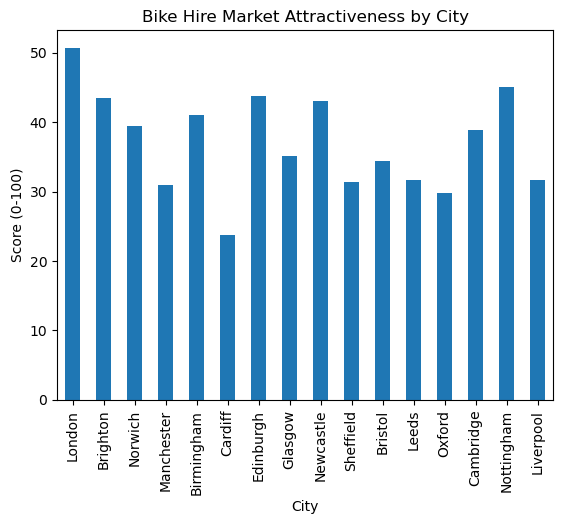

In [16]:
df_clean.plot(x="City", y="MarketScore", kind="bar", legend=False)
plt.title("Bike Hire Market Attractiveness by City")
plt.ylabel("Score (0-100)")
plt.show()


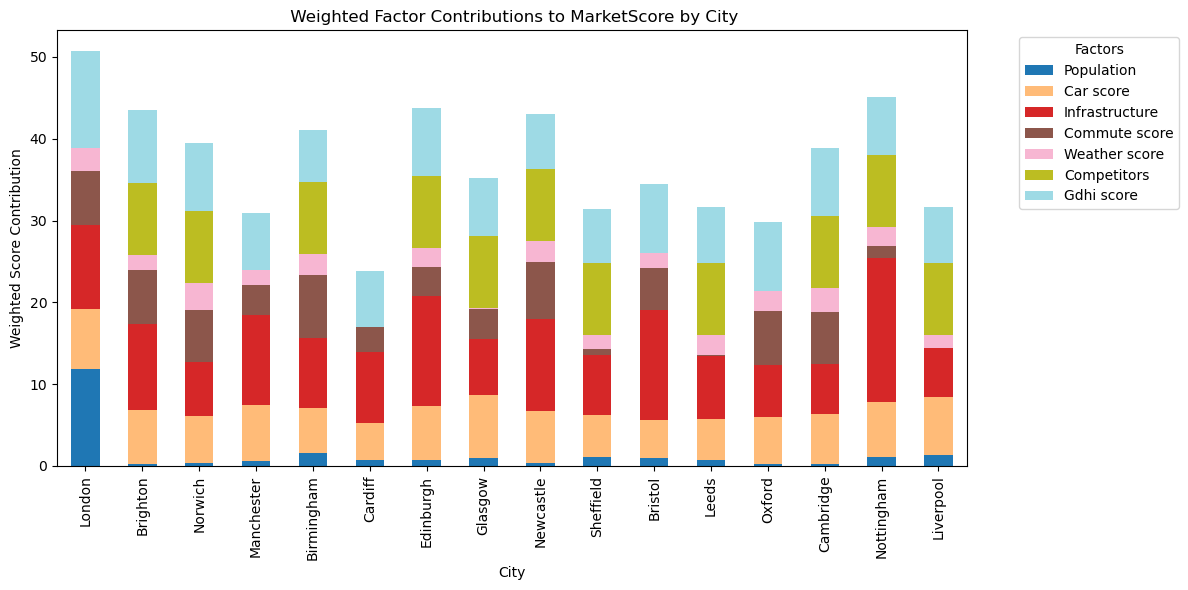

In [17]:
df_clean.set_index("City")[list(weights.keys())].mul(list(weights.values())).plot(
    kind="bar",
    stacked=True,
    figsize=(12,6),
    colormap="tab20"
)

plt.title(" Weighted Factor Contributions to MarketScore by City")
plt.ylabel("Weighted Score Contribution")
plt.legend(title="Factors", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [18]:
#Sustainability score
mindset = pd.read_csv('Data_MF/Sustainable Mindset.csv')
recycling = pd.read_csv('Data_MF/recycling rates.csv', header = 3)

#filtering recycled dataset
recycling_filtered = recycling[["Year","Authority", "Percentage of household waste sent for reuse, recycling or composting (Ex NI192)"]]

recycling_filtered = recycling_filtered.rename(columns={
    "Authority": "LocalAuthority",
    "Percentage of household waste sent for reuse, recycling or composting (Ex NI192)": "RecyclingRate"
})

recycling_filtered.to_csv("recycling_filtered.csv", index=False)

recycling_filtered["RecyclingRate"] = recycling_filtered["RecyclingRate"].str.replace("%","").astype(float)

recycling_filtered = recycling_filtered[recycling_filtered["Year"] == "2023-24"]

#mapping cities to boroughs
# Identify London boroughs
london_boroughs = recycling_filtered[
    recycling_filtered["LocalAuthority"].str.contains("London Borough|LB|City of London|Royal Borough", na=False)
]

# Calculate average recycling rate for London
london_avg = london_boroughs["RecyclingRate"].mean()

# Create a new row for London
london_row = pd.DataFrame({
    "Year": ["2023-24"],  # add Year here
    "LocalAuthority": ["London (average of boroughs)"],
    "RecyclingRate": [london_avg],
    "City": ["London"]
})

# Define mapping for other cities (excluding London since we handled it separately)
authority_to_city = {
    "Birmingham City Council": "Birmingham",
    "Brighton and Hove Council": "Brighton",
    "Bristol City Council": "Bristol",
    "Cambridge City and South Cambs Councils": "Cambridge",
    "Cardiff City Council": "Cardiff",
    "Edinburgh City Council": "Edinburgh",
    "Glasgow City Council": "Glasgow",
    "Leeds City Council MBC": "Leeds",
    "Liverpool City Council": "Liverpool",
    "Manchester City Council MBC": "Manchester",
    "Newcastle-upon-Tyne City Council MBC": "Newcastle",
    "Norwich City Council": "Norwich",
    "Nottingham City Council": "Nottingham",
    "Oxford City Council": "Oxford",
    "Sheffield City Council": "Sheffield"
}

# Map authorities to cities
recycling_filtered["City"] = recycling_filtered["LocalAuthority"].map(authority_to_city)

# Keep only matched cities
recycling_cities = recycling_filtered.dropna(subset=["City"])

# Append London row
recycling_cities = pd.concat([recycling_cities, london_row], ignore_index=True)

# Save
recycling_cities.to_csv("recycling_cities.csv", index=False)

#merging with mindset df
sustainability_df = pd.merge(recycling_cities[['City','RecyclingRate']], mindset, on='City', how='outer')

#creating one sustainability score
sustainability_df['SustainabilityScore'] = (sustainability_df['RecyclingRate'] + sustainability_df['Mindset Score'])/2
sustainability_df

#merging with market score

complete_df = pd.merge(sustainability_df, 
                       df_clean[['City', 'MarketScore']], 
                       on='City', 
                       how='inner')

complete_df = complete_df[['City', 'SustainabilityScore', 'MarketScore']]

complete_df

,City,SustainabilityScore,MarketScore
0,Birmingham,48.35000,41.082343
1,Brighton,50.20000,43.524271
2,Bristol,64.05000,34.426371
3,Cambridge,NaN,38.900153
4,Cardiff,66.55000,23.795539
5,Edinburgh,54.45000,43.771613
6,Glasgow,55.60000,35.187307
7,Leeds,55.65000,31.606241
8,Liverpool,51.60000,31.649435
9,London,52.54375,50.718931


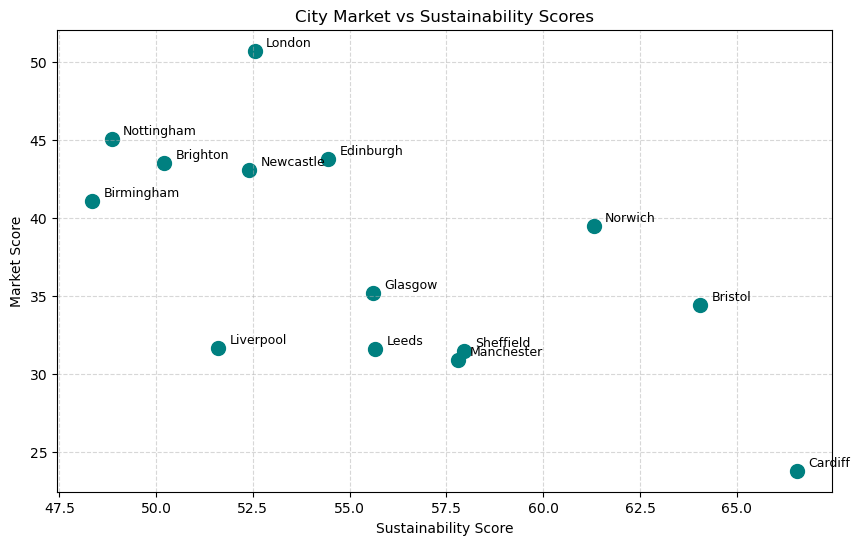

In [19]:
# Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(complete_df['SustainabilityScore'], 
            complete_df['MarketScore'], 
            color='teal', 
            s=100)

# Add city labels
for i, row in complete_df.iterrows():
    plt.text(row['SustainabilityScore'] + 0.3,  # small offset
             row['MarketScore'] + 0.3, 
             row['City'], 
             fontsize=9)

# Labels and title
plt.xlabel('Sustainability Score')
plt.ylabel('Market Score')
plt.title('City Market vs Sustainability Scores')

# Optional grid
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

In [20]:
sustainability_df

,City,RecyclingRate,Mindset Score,SustainabilityScore
0,Birmingham,22.7000,74.0,48.35000
1,Brighton,27.4000,73.0,50.20000
2,Bristol,45.1000,83.0,64.05000
3,Cambridge,48.6000,NaN,NaN
4,Cardiff,60.1000,73.0,66.55000
5,Edinburgh,40.9000,68.0,54.45000
6,Glasgow,27.2000,84.0,55.60000
7,Leeds,35.3000,76.0,55.65000
8,Liverpool,19.2000,84.0,51.60000
9,London,33.0875,72.0,52.54375


Correlation between GDHI and Market Score: 0.550
Correlation of GDHI with other numeric variables:

Avg GDHI                        1.000000
Gdhi score                      1.000000
Population                      0.723755
MarketScore                     0.549891
Commute score                   0.466001
Weather score                   0.355056
No Car Households Pct           0.286503
Car score                       0.286503
Infrastructure                  0.095038
Cycle Infra to Main Roads       0.095038
Average Annual Rainfall (mm)   -0.355056
Competitors                    -0.379871
Cycle Commute Ratio            -0.466001
Name: Avg GDHI, dtype: float64


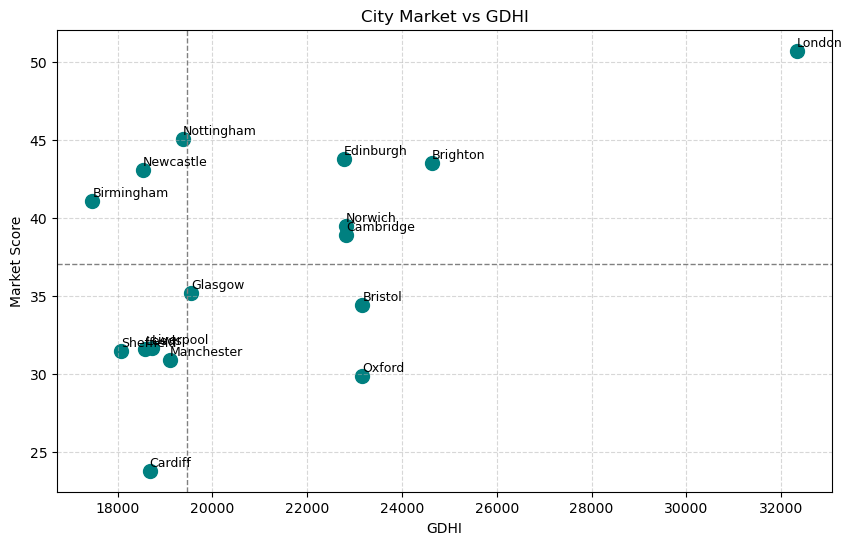

In [21]:
#Creating a scatterplot and determining no circular relationship for gdhi and market score
import seaborn as sns

# Select only numeric columns
numeric_df = df_clean.select_dtypes(include='number')

# Correlation between Avg GDHI and Market Score
corr = numeric_df["Avg GDHI"].corr(numeric_df["MarketScore"])
print(f"Correlation between GDHI and Market Score: {corr:.3f}")

# Correlation of GDHI with all other numeric columns
gdhi_corr = numeric_df.corr()["Avg GDHI"].sort_values(ascending=False)
print("Correlation of GDHI with other numeric variables:\n")
print(gdhi_corr)

#calculate median values
median_gdhi = df_clean['Avg GDHI'].median()
median_score = df_clean['MarketScore'].median()

#scatter
plt.figure(figsize=(10,6))
plt.scatter(df_clean['Avg GDHI'], 
            df_clean['MarketScore'], 
            color='teal', 
            s=100)

# Add city labels
for i, row in df_clean.iterrows():
    plt.text(row['Avg GDHI'] + 0.3,  # small offset
             row['MarketScore'] + 0.3, 
             row['City'], 
             fontsize=9)

#Quadrant lines
plt.axvline(median_gdhi, color='gray', linestyle='--', linewidth=1)
plt.axhline(median_score, color='gray', linestyle='--', linewidth=1)

# Labels and title
plt.xlabel('GDHI')
plt.ylabel('Market Score')
plt.title('City Market vs GDHI')

# Optional grid
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

In [22]:
print(df_clean.columns.tolist())

['City', 'Competitors', 'Average Annual Rainfall (mm)', 'Cycle Commute Ratio', 'Population', 'Cycle Infra to Main Roads', 'Avg GDHI', 'No Car Households Pct', 'Car score', 'Infrastructure', 'Commute score', 'Weather score', 'Gdhi score', 'MarketScore']
